In [1]:
using Plots
using Statistics
using CSV
using DataFrames
using Distributions
using Flux
import JSON
using MLUtils
using Plots
using StatsBase
using StatsPlots
using Tables

include("../scan_hyperparameters_cellnumobj_functions.jl")

main (generic function with 1 method)

In [2]:
target_directory = "../data/full_with_cellnumber/"

println("Formatting data...")
x_raw_df, y_df, cellnumber_df = getrawdata_withcellnum(target_directory)

# cutting
println("Cutting Transmission to 60-100 percent...")
lower::Float32 = 60
upper::Float32 = 120
x_raw_df, y_df = applycut(x_raw_df, y_df, "OBJ1", lower, upper; with_numcells=false)

# decorrelating
println("Decorrelating...")

x_df = decorrelatedvars(x_raw_df; with_numcells=false)

x_scaled_df, x_scalers = minmaxscaledf(x_df);
y_scaled_df, y_scalers = minmaxscaledf(y_df);

println("Done!")

Formatting data...
Cutting Transmission to 60-100 percent...
x_raw shape: (217293, 14)
y_raw shape: (217293, 6)
x_new shape: (161574, 14)
y_new shape: (161574, 6)
Decorrelating...
Done!


In [3]:
# can't use preexisting train/test sets for this ... different dataset // TODO
x_train_df, x_test_df, y_train_df, y_test_df = traintestsplit(
    x_scaled_df, cellnumber_df; read_in=false
)

x_train = Float32.(Matrix(x_train_df));
x_test = Float32.(Matrix(x_test_df));
y_train = Float32.(Matrix(y_train_df));
y_test = Float32.(Matrix(y_test_df));

- Generating new train and test sets


In [4]:
x_dimension = length(names(x_train_df))
y_dimension = length(names(y_train_df))

function neuralnetwork()
    Chain(
        Dense(x_dimension, 10, x->σ.(x)),
        Dense(10, 10, x->σ.(x)),
        Dense(10, 10, x->σ.(x)),
        Dense(10, 10, x->σ.(x)),
        Dense(10, 10, x->σ.(x)),
        Dense(10, y_dimension)
    )
end

neuralnetwork (generic function with 2 methods)

In [8]:
# organizing data into batches
batchsize = 1024
data_loader = Flux.Data.DataLoader((x_train', y_train'), batchsize=batchsize, shuffle=true);

# defining our model, optimization algorithm and loss function
m = neuralnetwork()
optimizer = ADAM()
loss(x, y) = Flux.binarycrossentropy(m(x), y)

loss (generic function with 1 method)

In [9]:
# training
n_epochs = 2500
training_losses = Float64[]
epochs = Int64[]

for epoch in 1:n_epochs
    print("epoch $epoch,")
    Flux.train!(loss, Flux.params(m), data_loader, optimizer)
    push!(epochs, epoch)
    l = 0.
    for d in data_loader
        l += loss(d...)
    end
    println(" loss=$l")
    push!(training_losses, l)
end

epoch 1, loss=88.09305727481842
epoch 2, loss=88.0476866364479
epoch 3, loss=88.05680459737778
epoch 4, loss=88.05899006128311
epoch 5, loss=88.0510675907135
epoch 6, loss=88.03261971473694
epoch 7, loss=88.0340626835823
epoch 8, loss=88.03043305873871
epoch 9, loss=88.0372924208641
epoch 10, loss=88.05094081163406
epoch 11, loss=88.02910786867142
epoch 12, loss=88.03147745132446
epoch 13, loss=88.03278434276581
epoch 14, loss=88.02842217683792
epoch 15, loss=88.060841858387
epoch 16, loss=88.02797454595566
epoch 17, loss=88.02841901779175
epoch 18, loss=88.03616338968277
epoch 19, loss=88.08149218559265
epoch 20, loss=88.02986830472946
epoch 21, loss=88.02941429615021
epoch 22, loss=88.03650122880936
epoch 23, loss=88.0422283411026
epoch 24, loss=88.04597294330597
epoch 25, loss=88.03381150960922
epoch 26, loss=88.03718799352646
epoch 27, loss=88.03770846128464
epoch 28, loss=88.04522395133972
epoch 29, loss=88.03157037496567
epoch 30, loss=88.02695453166962
epoch 31, loss=88.02871757

epoch 488, loss=87.95003592967987
epoch 489, loss=87.94621062278748
epoch 490, loss=87.94541817903519
epoch 491, loss=87.9791207909584
epoch 492, loss=87.97377389669418
epoch 493, loss=88.0125367641449
epoch 494, loss=87.9514752626419
epoch 495, loss=87.9604132771492
epoch 496, loss=87.95353597402573
epoch 497, loss=87.95542365312576
epoch 498, loss=87.95484834909439
epoch 499, loss=88.01035183668137
epoch 500, loss=87.96049982309341
epoch 501, loss=87.98245012760162
epoch 502, loss=87.9486653804779
epoch 503, loss=87.96966964006424
epoch 504, loss=87.96531683206558
epoch 505, loss=87.95932030677795
epoch 506, loss=87.9417684674263
epoch 507, loss=87.94312644004822
epoch 508, loss=87.95271247625351
epoch 509, loss=87.9955005645752
epoch 510, loss=87.97083133459091
epoch 511, loss=87.94754934310913
epoch 512, loss=87.95122730731964
epoch 513, loss=87.95189398527145
epoch 514, loss=87.94857382774353
epoch 515, loss=87.96083664894104
epoch 516, loss=87.94780045747757
epoch 517, loss=87.94

epoch 730, loss=87.90875339508057
epoch 731, loss=87.92386877536774
epoch 732, loss=87.98616737127304
epoch 733, loss=87.90852689743042
epoch 734, loss=87.92431712150574
epoch 735, loss=87.91374862194061
epoch 736, loss=87.93680363893509
epoch 737, loss=87.9170753955841
epoch 738, loss=87.91023725271225
epoch 739, loss=87.91255021095276
epoch 740, loss=87.93374449014664
epoch 741, loss=87.93592244386673
epoch 742, loss=87.91300171613693
epoch 743, loss=87.941350877285
epoch 744, loss=87.92019385099411
epoch 745, loss=87.91104346513748
epoch 746, loss=87.91350775957108
epoch 747, loss=87.90594565868378
epoch 748, loss=87.92308467626572
epoch 749, loss=87.90496307611465
epoch 750, loss=87.91517877578735
epoch 751, loss=87.91637670993805
epoch 752, loss=87.94480240345001
epoch 753, loss=87.91548693180084
epoch 754, loss=87.91243606805801
epoch 755, loss=87.97369456291199
epoch 756, loss=87.90519404411316
epoch 757, loss=87.90684694051743
epoch 758, loss=87.93025851249695
epoch 759, loss=8

epoch 1207, loss=87.8674778342247
epoch 1208, loss=87.86076128482819
epoch 1209, loss=87.88534063100815
epoch 1210, loss=87.87733125686646
epoch 1211, loss=87.86536508798599
epoch 1212, loss=87.86047232151031
epoch 1213, loss=87.87934499979019
epoch 1214, loss=87.86791414022446
epoch 1215, loss=87.88541448116302
epoch 1216, loss=87.86562263965607
epoch 1217, loss=87.90239000320435
epoch 1218, loss=87.86444294452667
epoch 1219, loss=87.8628101348877
epoch 1220, loss=87.86517697572708
epoch 1221, loss=87.88383835554123
epoch 1222, loss=87.88235533237457
epoch 1223, loss=87.864805996418
epoch 1224, loss=87.88167482614517
epoch 1225, loss=87.86436533927917
epoch 1226, loss=87.87547916173935
epoch 1227, loss=87.86338967084885
epoch 1228, loss=87.87012380361557
epoch 1229, loss=87.88675582408905
epoch 1230, loss=87.86197209358215
epoch 1231, loss=87.86217623949051
epoch 1232, loss=87.86586773395538
epoch 1233, loss=87.86232608556747
epoch 1234, loss=87.87535721063614
epoch 1235, loss=87.8737

epoch 1677, loss=87.81203454732895
epoch 1678, loss=87.80936050415039
epoch 1679, loss=87.81026780605316
epoch 1680, loss=87.80233919620514
epoch 1681, loss=87.8255769610405
epoch 1682, loss=87.80480414628983
epoch 1683, loss=87.81135910749435
epoch 1684, loss=87.81039941310883
epoch 1685, loss=87.81084161996841
epoch 1686, loss=87.80723738670349
epoch 1687, loss=87.80533188581467
epoch 1688, loss=87.80458301305771
epoch 1689, loss=87.80198729038239
epoch 1690, loss=87.80814492702484
epoch 1691, loss=87.80465757846832
epoch 1692, loss=87.81028819084167
epoch 1693, loss=87.838818192482
epoch 1694, loss=87.80746859312057
epoch 1695, loss=87.81092661619186
epoch 1696, loss=87.83153033256531
epoch 1697, loss=87.81842708587646
epoch 1698, loss=87.81218194961548
epoch 1699, loss=87.80937188863754
epoch 1700, loss=87.83165836334229
epoch 1701, loss=87.80945879220963
epoch 1702, loss=87.8229210972786
epoch 1703, loss=87.80951178073883
epoch 1704, loss=87.80165588855743
epoch 1705, loss=87.8107

LoadError: DomainError with -0.0027240627:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).

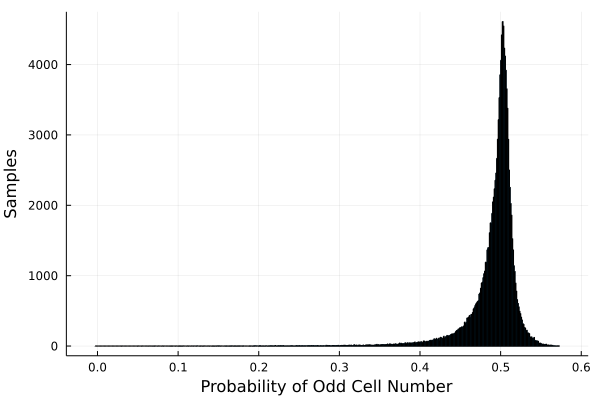

In [45]:
histogram(m(x_train')'; xlabel="Probability of Odd Cell Number", ylabel="Samples", legend=false)

In [52]:
# predictions
train_proba_preds = m(x_train')'; test_proba_preds = m(x_test')';
train_preds = round.(train_proba_preds); test_preds = round.(test_proba_preds);

In [63]:
println(sum(y_train .== train_preds) / length(y_train))
println(sum(y_test .== test_preds) / length(y_test))

0.5162116371007048
0.504626334519573
